<a href="https://www.kaggle.com/code/debanshu03/flight-price-prediction?scriptVersionId=245768321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [5]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df['duration'].value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [12]:
print(df['duration'].describe())

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64


**Pre Processing**
* drop unnamed, flight
* hot encode airline, source & dest city, arrival & dep time
* turn stops into 0,1,2
* turn  class into 0,1

In [13]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x:1 if x== 'Business' else 0)

In [14]:
df.stops = pd.factorize(df.stops)[0]

In [15]:
df = df.join(pd.get_dummies(df.airline, prefix = 'airline')).drop('airline', axis =1)
df = df.join(pd.get_dummies(df.source_city, prefix = 'source')).drop('source_city', axis =1)
df = df.join(pd.get_dummies(df.destination_city, prefix = 'dest')).drop('destination_city', axis =1)
df = df.join(pd.get_dummies(df.arrival_time, prefix = 'arrival')).drop('arrival_time', axis =1)
df = df.join(pd.get_dummies(df.departure_time, prefix = 'departure')).drop('departure_time', axis =1)

In [16]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


**Training Regression Model**

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,y = df.drop('price', axis=1), df.price

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import absolute error to know how much we deviate from actual price

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MEA:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9855637526902411
MEA: 1061.8821596107884
MSE: 7451717.430563499
RMSE: 2729.7834035988094


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

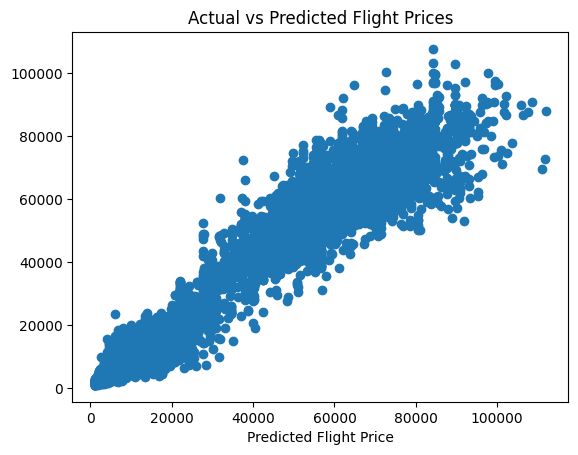

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.xlabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')

In [22]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

**Refining the  model**

Importance of features

In [23]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8798046432402359),
 ('duration', 0.057302812804687964),
 ('days_left', 0.018593550767613234),
 ('airline_Vistara', 0.0052691454144550304),
 ('airline_Air_India', 0.004793134939821832),
 ('source_Delhi', 0.004014608434960019),
 ('dest_Delhi', 0.0034920378898654755),
 ('source_Mumbai', 0.0022006398438942764),
 ('dest_Mumbai', 0.001872112615043684),
 ('stops', 0.0018521558512434445),
 ('dest_Kolkata', 0.0017972449145454332),
 ('source_Kolkata', 0.0016440853584466994),
 ('dest_Hyderabad', 0.001593574412166721),
 ('arrival_Evening', 0.001436652533160022),
 ('source_Hyderabad', 0.00133124094265524),
 ('arrival_Night', 0.0011472958412975152),
 ('departure_Evening', 0.0011252663055051596),
 ('dest_Bangalore', 0.0010943380980773323),
 ('source_Bangalore', 0.0010891113918169986),
 ('arrival_Afternoon', 0.0010243734367673),
 ('source_Chennai', 0.0009242204887694232),
 ('departure_Morning', 0.0008919128504100606),
 ('dest_Chennai', 0.0008640805409961989),
 ('departure_Afternoon', 0.00

In [24]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

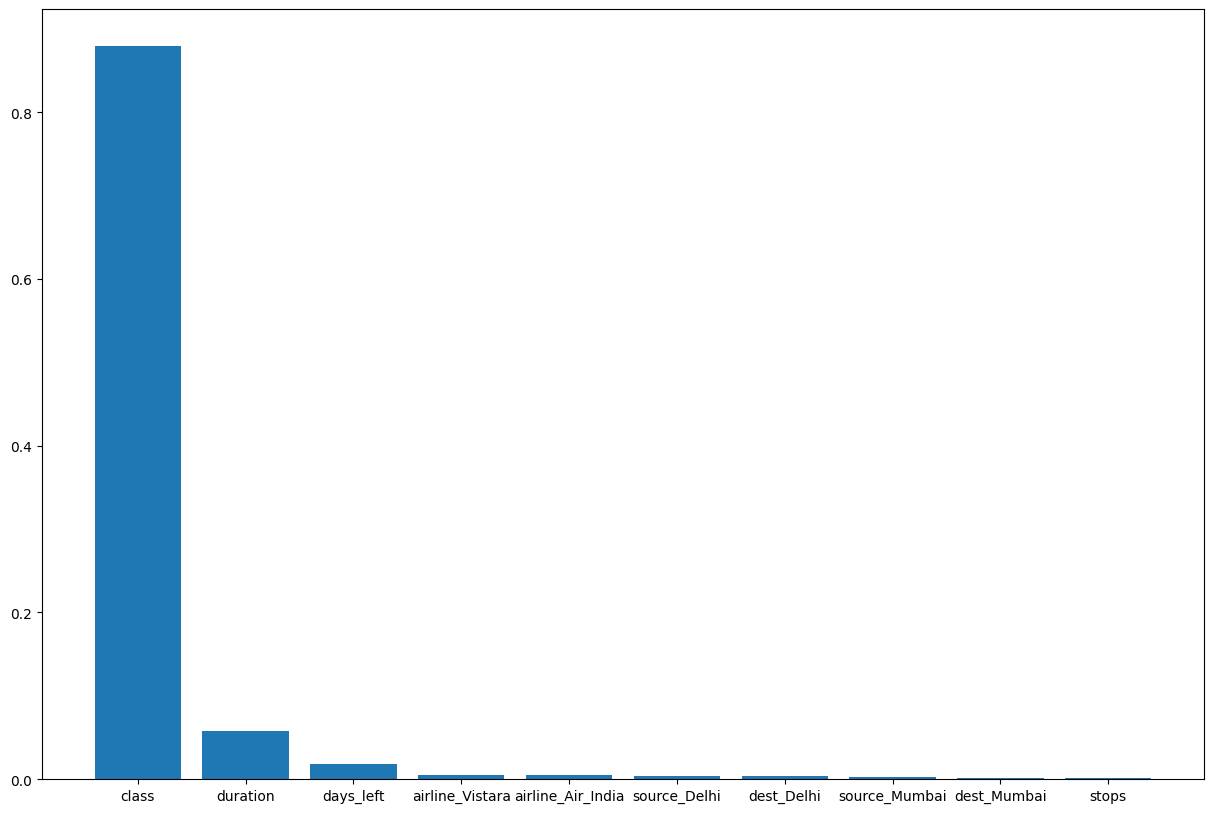

In [25]:
plt.figure(figsize=(15,10))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'sqrt']  # Removed 'auto'
}

reg= RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)
random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [27]:
best_regressor.score(X_test, y_test)

0.9864783003278145

98.655% Accuracy

In [28]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import absolute error to know how much we deviate from actual price

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MEA:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9864783003278145
MEA: 1079.14400726363
MSE: 6979645.262100488
RMSE: 2641.901826734008


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

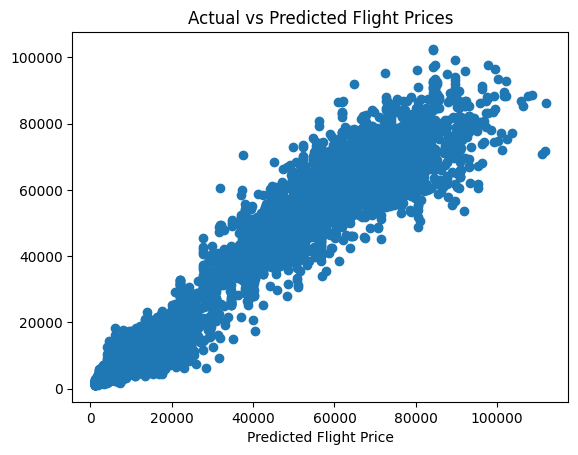

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.xlabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')